# Nuvem de Palavras Chaves em currículos

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pdfplumber
import nltk

def NuvemDePlavras(cv, salvar=True):
    '''
    cv: caminho do PDF
    '''
    
    #carregando o currículo
    arquivo_pdf = pdfplumber.open(cv)
    text_pags = ''
    
    #percorrendo todas as paginas do cv
    for i in range(len(arquivo_pdf.pages)):
        text = arquivo_pdf.pages[i].extract_text()
        text_pags = text_pags + text
        
    
    # criando uma lista de stop words "a", "de", "um"... que não tem valor como palavra
    nltk.download('stopwords')
    stop_words = nltk.corpus.stopwords.words('portuguese')
    stop_words
    
    #criando uma lista de termos
    lista_palavras = nltk.tokenize.word_tokenize(text_pags)
    
    #colocando tudo em maiúsculo
    lista_palavras = [palavra.upper() for palavra in lista_palavras]
    
    keywords = [palavra for palavra in lista_palavras if not palavra in stop_words]
    
    #removendo todos caractedes não alfanúmerico
    text_cv = " ".join(s for s in keywords if s.isalnum())
    
    #configurando o wordcloud
    wordcloud = WordCloud(
                    background_color= '#0f54c9',
                    max_font_size= 150,
                    width= 1280,
                    height= 720,
                    colormap= 'Blues').generate(text_cv)
    
    
    # imprimindo o grafico
    fig, ax = plt.subplots(figsize=(16,9))
    ax.imshow(wordcloud)
    ax.set_axis_off()
    plt.imshow(wordcloud)
    
    if salvar:
        wordcloud.to_file('wordcloud.png')
        
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\caio_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


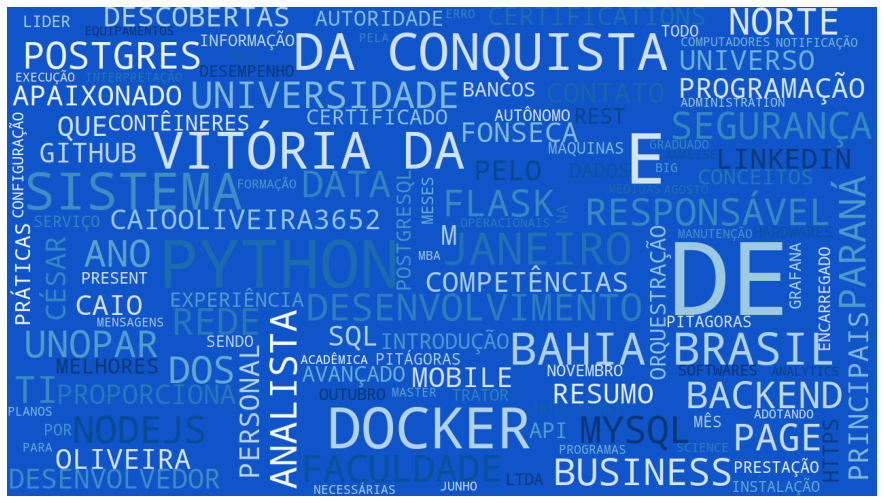

In [4]:
NuvemDePlavras('Profile.pdf')